<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Game Theory and Optimization

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from matplotlib import patches


# The Product Rule

$$h(x) = f(x) g(x) \quad h'(x) = f(x) g'(x) + f'(x) g(x)$$

<div></div>
<div></div>
<div></div><div></div>

<div></div>

<div></div>

<div></div>
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

# Extreme Values on Closed Intervals

<div class="alert alert-info">
  <strong style = {color = 'white'}>Extreme Values on Closed Intervals</strong> 
    Assume that $f(x)$ is continuus on $[a, b]$ and let $f(c)$ be the minimum or maximum value on $[a, b]$.  The $c$ is either a critical point or one of the endpoints $a$ or $b$.

**EX**: $f(x) = 2x^3 - 15x^2 + 24x + 7$ on $[0,6]$

In [27]:
def f(x):
    return 2*x**3 - 15*x**2 + 24*x + 7

x = np.linspace(0, 6, 1000)

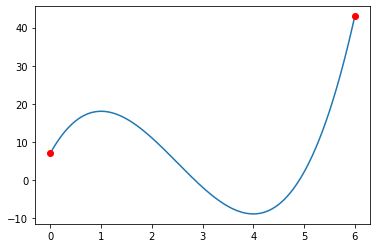

In [31]:
plt.plot(x, f(x))
plt.plot(0, f(0), 'ro')
plt.plot(6, f(6), 'ro')

In [32]:
options = [0, 1, 4, 6]
possible_max_min = [f(0), f(1), f(4), f(6)]

In [33]:
import pandas as pd

In [34]:
pd.DataFrame({'options': options, 'max_min?': possible_max_min})

,options,max_min?
0,0,7
1,1,18
2,4,-9
3,6,43


**Ex**: Maximum of $f(x) = 1 - ( x - 1)^{2/3}$ on $[-1, 2]$

In [46]:
def f(x): return 1-(x-1)**(2/3)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


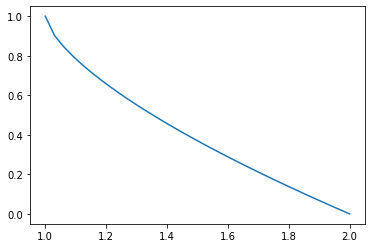

In [47]:
x = np.linspace(-1, 2, 100)
plt.plot(x, f(x))

In [48]:
f(-1)

(1.7937005259840992-1.3747296369986028j)

In [49]:
f(1)

1.0

In [50]:
f(2)

0.0

# Arbitrating Disputes with John Nash

This notebook introduces the use of max/min problems in arbitrating a dispute between two parties.  For example, suppose you have a bachelor or bachelorette party to plan.  The parties involved will likely have different opinions to how and where the participants think the days and nights should be spent.  Is there a way to determine an outcome that is most amenable to all?

Mathematician John Nash believed there was, and he deployed a method that relied on maximizing a product of values, much like Fermat's original problem.  Now, however, Nash's quantities represented peoples preferences for certain outcomes.  This ideal solution is referred to as the Nash Equilibrium, found using the calculus of maximums and minimums of products.

![](http://i.dailymail.co.uk/i/pix/2015/05/24/15/290874A900000578-3095059-image-a-35_1432478026946.jpg)

## First Example

Let's suppose you are planning a weekend away with a friend.  You have three choices:

- Stay in city and do nothing (S)

- Bike upstate and go camping (C)

- Go to Rockaways for weekend (B)

You and your friend have different preferences for these, and could measure them by assigning some numeric value to each choice.  We call these *utilities*.  For example, we can denote your utility as $u_y$ and your friends utilities as $u_f$.  If you were to assign values to each of these choices, the result may look something like:

$$u_y(C) = 2 \quad u_y(S) = 5 \quad u_y(B) = 7$$

and for your friend

$$u_f(C) = 1 \quad u_f(S) = 3 \quad u_f(B) = 6$$

In [4]:
uy = [2, 5, 7]
uf = [1, 3, 6]

In [5]:
np.diff(uy)

array([3, 2])

Thus, we have the relationship:

$$u_y(C) - u_y(S) = 3$$

$$u_y(B) - u_y(C) = 2$$

If you think about when these would be the same, you would have to multiply the second equation by $3/2$.  You can interpret this as saying that your preference for going camping is one and a half times greater than your preference for going to the beach.

In [6]:
np.diff(uf)

array([2, 3])

Seems we have the exact opposite outcome for your friend.  

We can also see from this that preferences needn't be the exact same values for them to represent the same preference.

Accordingly, we will say that two utilities $u$ and $v$ are equivalent when you have numbers $a$ and $b$ such that $v = au + b$.

For example, the utilities:

$$u_j(C) = 3 \quad u_j(S) = 5 \quad u_j(B) = 9$$

and 

$$u_k(C) = 3 \quad u_j(S) = 7 \quad u_j(B) = 15$$

are equivalent because:

$$u_k = 2u_j - 3$$



#### PROBLEM

Which of the following is equivalent to:

$$u_F(B) = 10 \quad u_F(SQ) = 3 \quad u_F(M) = 2$$

---


- $v_F(B) = 10 \quad v_F(SQ) = -4 \quad v_F(M) = -6$

- $w_F(B) = 20 \quad w_F(SQ) = 2 \quad w_F(M) = -1 $

## Payoff Polygon

We are able to visualize the preferences of two parties by assinging an axis to each participant, and plotting the corresponding utility for each choice as an ordered pair. Before we do this, we want to *normalize* the utilities by creating a common base value around one option.  We can use the $S$ to normalize the first utilities as:

$$u_y(C) = -3 \quad u_y(S) = 0 \quad u_y(B) = 2$$

and 

$$u_f(C) = -2 \quad u_f(S) = 0 \quad u_f(B) = 3$$

For example, consider our first example with $u_f$ and $u_y$.  We will plot $u_f$ as the $x$ coordinates and $u_y$ as the $y$ coordinates.

In [7]:
C = [-3, -2]
S = [0, 0]
B = [2, 3]

In [8]:
a = np.array([C, S, B])

In [9]:
np.shape(a)

(3, 2)

Text(0.5, 1.0, 'Payoff Polygon')

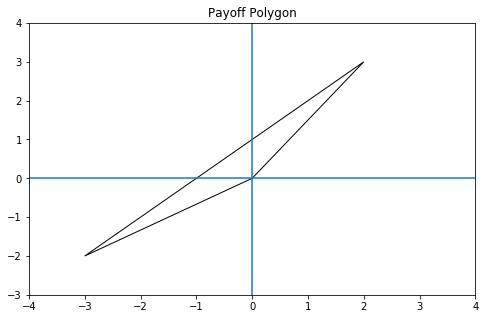

In [10]:
fig1 = plt.figure(figsize = (8, 5))
ax1 = fig1.add_subplot(111)
ax1.add_patch(patches.Polygon(a, fill = False))


plt.xlim(-4, 4)
plt.ylim(-3, 4)
plt.axhline()
plt.axvline()
plt.title("Payoff Polygon")

The ideal outcome here should be fairly obvious, as both participants showed a clear preference for the beach.  Suppose however, we reverse the scenario, and now have your friends preferences inverted from yours.

$$u_y(C) = -1 \quad u_y(S) = 0 \quad u_y(B) = 3$$

$$u_f(C) = 2 \quad u_f(S) = 0 \quad u_f(B) = -1$$



In [11]:
C = [-1, 2]
S = [0,0]
B = [3, -1]
a = np.array([C, S, B])

Text(0.5, 1.0, 'Payoff Polygon II')

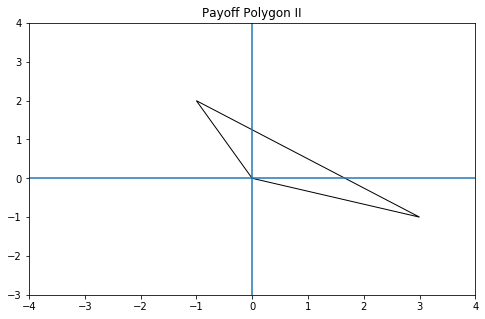

In [12]:
fig1 = plt.figure(figsize = (8, 5))
ax1 = fig1.add_subplot(111)
ax1.add_patch(patches.Polygon(a, fill = False))


plt.xlim(-4, 4)
plt.ylim(-3, 4)
plt.axhline()
plt.axvline()
plt.title("Payoff Polygon II")

If we consider the solutions here, we note that for both participants we have normalized these values so that the preference for $S$ is 0.  Hence, any solution should have better outcomes than this, which would mean it has positive values of $x$ and $y$.  This is called the Pareto condition formally, but it should make intuitive sense.

Additionally, Nash proposed other important criteria for a fair solution and determine that *there is exactly one arbitration solution that satisfies these conditions*:


$~$

<div class="alert alert-info">
  <strong style = {color = 'white'}>Nash's Theorem</strong> 
  
  
  
<li> if there are no points in $P$ with $x > 0$ or $y > 0$, let $N = (0, 0)$.</li>



<li> if there are no points in $P$ with $y > 0$, but are points with $y = 0$ and $x > 0$, then let $N$ be the point $(x, 0)$ which maximizes $x$.  Handle the case with $x$ and $y$ interchanged similarly. </li>



<li> if there are points in $P$ with both $x > 0$ and $y>0$, let $N$ be the point with $X > 0$ and $y > 0$ which maximizes the product $xy$.
</div>

Focus on the last criteria.  Nash claims that the ideal solution to the problem is the maximum of $xy$ in the first quadrant.  Let's just consider this region.


Text(0.5, 1.0, 'Payoff Polygon in the First Quadrant')

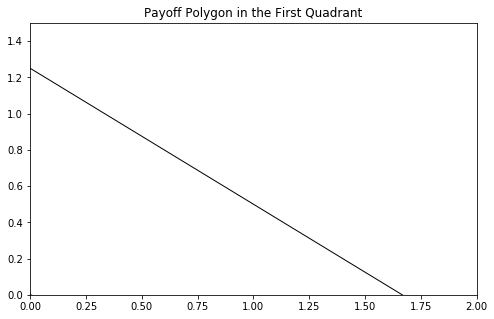

In [13]:
fig1 = plt.figure(figsize = (8, 5))
ax1 = fig1.add_subplot(111)
ax1.add_patch(patches.Polygon(a, fill = False))


plt.xlim(0, 2)
plt.ylim(0, 1.5)
plt.title("Payoff Polygon in the First Quadrant")

The question is where is the maximum of $xy$ here?

We can use our maximization work to answer this.  First however, we want to express $y$ in terms of $x$ or vice versa so we have an easier expression to deal with.

The line segment we see above is the result of drawing a straight line through the points $(-1, 2)$ and $(3, -1)$. We will write an equation for a line through these two points.

We will spend some time here as this is an important skill for us to remember from our work with sequences.

### Equation of lines

This is essentially the same as our slope terminology for a linear function, and we can use the point slope form of a linear equation to get the equation.

$$y = m(x - x_1) + y_2$$

$$ y = \frac{-3}{4}(x - (-1)) + 2$$

In [14]:
x, y = sy.symbols('x y')

In [15]:
y = -3/4*(x - (-1)) + 2

In [16]:
y

1.25 - 0.75*x

In [17]:
def f(x):
    return -0.75*x + 1.25

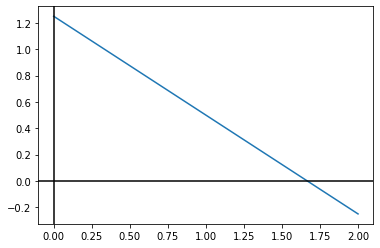

In [18]:
x = np.linspace(0, 2, 100)
plt.plot(x, f(x))
plt.axhline(color = 'black')
plt.axvline(color = 'black')

Thus, our problem has become maximizing $xy$ or $x(\frac{-3}{4}x + \frac{5}{4})$.

In [19]:
def p(x):
    return x*f(x)

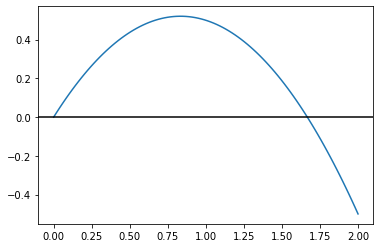

In [20]:
x = np.linspace(0, 2, 100)
plt.plot(x, p(x))
plt.axhline(color = 'black')

In [21]:
x = sy.Symbol('x')

In [22]:
eq = sy.diff(p(x), x)

In [23]:
sy.solve(eq)

[0.833333333333333]

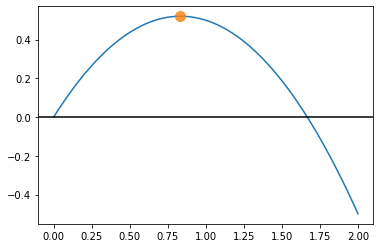

In [24]:
x = np.linspace(0, 2, 100)
plt.plot(x, p(x))
plt.axhline(color = 'black')
plt.plot(0.83333, p(0.8333), 'o', markersize = 10, alpha = 0.8)

In [25]:
f(0.833333333)

0.62500000025

Text(0.5, 1.0, 'Payoff Polygon II')

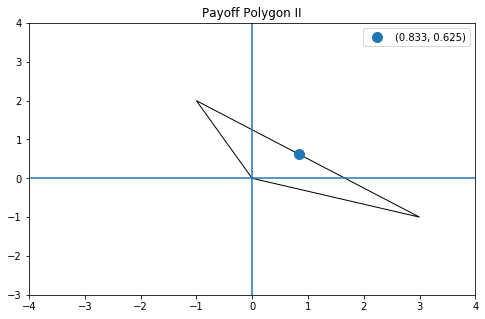

In [26]:
fig1 = plt.figure(figsize = (8, 5))
ax1 = fig1.add_subplot(111)
ax1.add_patch(patches.Polygon(a, fill = False))
plt.plot(0.833333, f(0.83333333), 'o', markersize = 10, label = (0.833, 0.625))
plt.legend()

plt.xlim(-4, 4)
plt.ylim(-3, 4)
plt.axhline()
plt.axvline()
plt.title("Payoff Polygon II")

### Interpreting the Solution

Thus, there is not a clear choice that wins, and instead we are at a solution somewhere between the beach and mountains.  This could be understood as a lottery situation where we have some mixture of possibilities beach and mountain.  We deine a lottery as follows:

**Lottery**: Some lottery $L$ between outcomes $A$ and $B$, with probability $p$ of $A$ and $1-p$ for $B$.  Then, for any utility function $u$ the utility of the lottery is 

$$u(L) = pu(A) + (1 - p)(u(B))$$

Thus, in the example above, our $u$ is the line we see the point on, and which we defined earlier.  

$$u_y(L) = pu_y(B) + (1 - p)u_y(M)$$

$$u_f(L) = pu_f(B) + (1 - p)u_y(M)$$

or 

$$0.833 = p(-1) + (1-p)(3)$$

$$0.625 = p(2) + (1-p)(-1)$$

We can solve either one of these to obtain our $p$.

In [168]:
p = sy.Symbol('p')
eq = -1*p + (1-p)*3 - 0.833
p = sy.solve(eq)

In [169]:
p

[0.541750000000000]

In [170]:
type(p)

list

In [171]:
p.append(1-p[0])

In [172]:
p

[0.541750000000000, 0.458250000000000]

Thus, if we have a lottery where the probability of beach is near 0.54 and the mountains is 0.46, we would have the best solution.